# Chapter 6 Lab 5

## Goal
In this lab, we will walk through applying Archetypal Analysis (AA) to obtain archetypes from the data.

## Preparation

First, install the archetypes package and import all other necessary packages.  The archetype code is a scikit-learn compatible package from Aleix Alcacer's git repository at https://github.com/aleixalcacer/archetypes

In [101]:
#! pip install archetypes

In [199]:
import archetypes as arch
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Step 1: Data Pre-processing

Let's read in the data and take a quick look at it.

In [156]:
dota_df1 = pd.read_csv('DoTalicious_cleaned1000players.csv')
dota_player = pd.DataFrame(dota_df1['PlayerID']) # This is new. We're going to use this at the end of the lab!
dota_df1.drop(['PlayerID'], axis=1, inplace=True)
dota_df1.head()

,GamesPlayed,GamesWon,GamesLeft,Ditches,Points,SkillLevel,Kills,KillsPerMin,Deaths,Assists,CreepsKilled,CreepsDenied,NeutralsKilled,TowersDestroyed,RaxsDestroyed,TotalTime
0,447,248,6,6,1111.360,1,2271,0.12,1889,4201,38736,3058,3456,355,151,1116780
1,66,39,0,0,989.882,1,373,0.13,450,745,4484,518,455,49,23,169800
2,3,0,0,0,1000.000,0,11,0.11,28,18,186,10,7,0,0,6180
3,100,59,5,1,1228.460,1,1079,0.26,448,934,13943,1885,1417,132,36,250200
4,1,1,0,0,1020.000,0,9,0.28,2,10,38,8,3,0,0,1944


In [164]:
dota_player

,PlayerID
0,0
1,1
2,2
3,3
4,4
...,...
863,994
864,997
865,998
866,999


In [104]:
dota_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GamesPlayed       868 non-null    int64  
 1   GamesWon          868 non-null    int64  
 2   GamesLeft         868 non-null    int64  
 3   Ditches           868 non-null    int64  
 4   Points            868 non-null    float64
 5   SkillLevel        868 non-null    object 
 6   Kills             868 non-null    int64  
 7   KillsPerMin       868 non-null    float64
 8    Deaths           868 non-null    int64  
 9   Assists           868 non-null    int64  
 10  CreepsKilled      868 non-null    int64  
 11  CreepsDenied      868 non-null    int64  
 12   NeutralsKilled   868 non-null    int64  
 13   TowersDestroyed  868 non-null    int64  
 14   RaxsDestroyed    868 non-null    int64  
 15   TotalTime        868 non-null    object 
dtypes: float64(2), int64(12), object(2)
memory u

Notice that we will need to change some data types.

In [105]:
dota_df1[' TotalTime'] = pd.to_numeric(dota_df1[' TotalTime'], errors="coerce")

We'll make a quick fix to an odd value in SkillLevel too. I've randomly chosen to make it a 1.

In [180]:
dota_df1.loc[dota_df1['SkillLevel'] ==' SkillLevelNull', 'SkillLevel'] = '1'

Lastly, let's work on the SkillLevel column!

In [107]:
dota_df1['SkillLevel'] = pd.Series(dota_df1['SkillLevel'].astype('category'))
dota_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   GamesPlayed       868 non-null    int64   
 1   GamesWon          868 non-null    int64   
 2   GamesLeft         868 non-null    int64   
 3   Ditches           868 non-null    int64   
 4   Points            868 non-null    float64 
 5   SkillLevel        868 non-null    category
 6   Kills             868 non-null    int64   
 7   KillsPerMin       868 non-null    float64 
 8    Deaths           868 non-null    int64   
 9   Assists           868 non-null    int64   
 10  CreepsKilled      868 non-null    int64   
 11  CreepsDenied      868 non-null    int64   
 12   NeutralsKilled   868 non-null    int64   
 13   TowersDestroyed  868 non-null    int64   
 14   RaxsDestroyed    868 non-null    int64   
 15   TotalTime        867 non-null    float64 
dtypes: category(1), float64(3)

In [108]:
dota_df1['SkillLevel'] = dota_df1['SkillLevel'].cat.rename_categories({'0':'N', '1':'B', '2':'I', '3':'A'})
dota_df1.head()

,GamesPlayed,GamesWon,GamesLeft,Ditches,Points,SkillLevel,Kills,KillsPerMin,Deaths,Assists,CreepsKilled,CreepsDenied,NeutralsKilled,TowersDestroyed,RaxsDestroyed,TotalTime
0,447,248,6,6,1111.360,B,2271,0.12,1889,4201,38736,3058,3456,355,151,1116780.0
1,66,39,0,0,989.882,B,373,0.13,450,745,4484,518,455,49,23,169800.0
2,3,0,0,0,1000.000,N,11,0.11,28,18,186,10,7,0,0,6180.0
3,100,59,5,1,1228.460,B,1079,0.26,448,934,13943,1885,1417,132,36,250200.0
4,1,1,0,0,1020.000,N,9,0.28,2,10,38,8,3,0,0,1944.0


Next, let's check for null values and remove those.

In [109]:
dota_df1.isna().sum().sum()

1

In [110]:
dota_df1[dota_df1.isnull().any(axis=1)]

,GamesPlayed,GamesWon,GamesLeft,Ditches,Points,SkillLevel,Kills,KillsPerMin,Deaths,Assists,CreepsKilled,CreepsDenied,NeutralsKilled,TowersDestroyed,RaxsDestroyed,TotalTime
517,0,0,0,0,1000.0,N,0,0.0,0,0,0,0,0,0,0,NaN


In [111]:
dota_df1.drop([517], inplace=True)

In [112]:
dota_df1.isna().sum().sum()

0

Also, since SkillLevel is categorical, sklearn dbscan cannot use it. We will copy it into a dataframe of its own (which will come in handy for us at the end of the lab).

In [113]:
dota_level = pd.DataFrame(dota_df1['SkillLevel']) # We're going to use this at the end of the lab!
dota_df1.drop(['SkillLevel'], axis=1, inplace=True)
dota_df1.head()

,GamesPlayed,GamesWon,GamesLeft,Ditches,Points,Kills,KillsPerMin,Deaths,Assists,CreepsKilled,CreepsDenied,NeutralsKilled,TowersDestroyed,RaxsDestroyed,TotalTime
0,447,248,6,6,1111.360,2271,0.12,1889,4201,38736,3058,3456,355,151,1116780.0
1,66,39,0,0,989.882,373,0.13,450,745,4484,518,455,49,23,169800.0
2,3,0,0,0,1000.000,11,0.11,28,18,186,10,7,0,0,6180.0
3,100,59,5,1,1228.460,1079,0.26,448,934,13943,1885,1417,132,36,250200.0
4,1,1,0,0,1020.000,9,0.28,2,10,38,8,3,0,0,1944.0


In [114]:
dota_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867 entries, 0 to 867
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GamesPlayed       867 non-null    int64  
 1   GamesWon          867 non-null    int64  
 2   GamesLeft         867 non-null    int64  
 3   Ditches           867 non-null    int64  
 4   Points            867 non-null    float64
 5   Kills             867 non-null    int64  
 6   KillsPerMin       867 non-null    float64
 7    Deaths           867 non-null    int64  
 8   Assists           867 non-null    int64  
 9   CreepsKilled      867 non-null    int64  
 10  CreepsDenied      867 non-null    int64  
 11   NeutralsKilled   867 non-null    int64  
 12   TowersDestroyed  867 non-null    int64  
 13   RaxsDestroyed    867 non-null    int64  
 14   TotalTime        867 non-null    float64
dtypes: float64(3), int64(12)
memory usage: 108.4 KB


Now that we've got some nice data, let's scale it. 

Also, let's get rid of some of the leading spaces in the columns names.

In [115]:
scaler = StandardScaler()
dota_df2 = pd.DataFrame(scaler.fit_transform(dota_df1), columns = dota_df1.columns)
dota_df2 = dota_df2.rename(columns=lambda x: x.strip())
dota_df2

,GamesPlayed,GamesWon,GamesLeft,Ditches,Points,Kills,KillsPerMin,Deaths,Assists,CreepsKilled,CreepsDenied,NeutralsKilled,TowersDestroyed,RaxsDestroyed,TotalTime
0,1.726192,1.707709,1.343489,2.925072,0.805092,1.106833,-0.179345,1.116715,1.457369,1.571490,1.173404,0.740012,1.616977,1.625071,1.871061
1,-0.128221,-0.098239,-0.509820,-0.393625,-0.208189,-0.156910,-0.027349,-0.079019,-0.092739,-0.159318,-0.078688,-0.271179,-0.123951,-0.090333,-0.123286
2,-0.434856,-0.435234,-0.509820,-0.393625,-0.123792,-0.397940,-0.331341,-0.429678,-0.418818,-0.376502,-0.329107,-0.422133,-0.402727,-0.398570,-0.467871
3,0.037265,0.074579,1.034604,0.159491,1.781855,0.313165,1.948600,-0.080680,-0.007967,0.318661,0.595174,0.052969,0.348262,0.083887,0.046037
4,-0.444591,-0.426593,-0.509820,-0.393625,0.043034,-0.399271,2.252592,-0.451283,-0.422406,-0.383981,-0.330093,-0.423481,-0.402727,-0.398570,-0.476792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,-0.444591,-0.435234,-0.509820,-0.393625,-0.123792,-0.401935,0.428639,-0.447959,-0.423303,-0.382111,-0.330586,-0.419100,-0.402727,-0.398570,-0.476899
863,-0.332644,-0.357466,-0.200936,-0.393625,-0.753041,-0.342010,-0.635333,-0.300882,-0.347054,-0.321928,-0.271432,-0.294091,-0.345834,-0.371767,-0.350987
864,-0.444591,-0.435234,-0.509820,-0.393625,-0.123792,-0.404598,-1.395313,-0.448790,-0.426443,-0.384992,-0.333543,-0.424491,-0.402727,-0.398570,-0.477371
865,0.061601,0.221474,-0.200936,0.159491,1.076935,0.558856,3.164568,0.107114,0.089363,0.153523,0.125393,0.030730,0.371019,0.271510,0.056272


## Step 2: Apply the Archetypal Analysis

First, let's employ the Elbow method once again.

In [190]:
arch_model= [arch.AA(n_archetypes=k, n_init=10, max_iter=30, random_state=2063).fit(dota_df2)
                for k in range(1,11)]
inertias = [model.rss_ for model in arch_model]

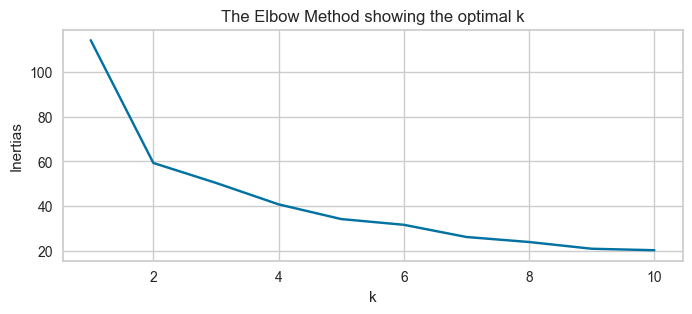

In [191]:
plt.figure(figsize=(8,3))
plt.plot(range(1,11), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertias')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Reviewing the elbow, 6 seems a reasonable choice for K, though a case could be made for 10 as well. In practice, you'd normally be better off with the lesser of the two. Let's compare.

Below, we can see the archetypes with K=10.

In [192]:
arch_model= arch.AA(n_archetypes=10, n_init=10, max_iter=30, random_state=2063).fit(dota_df2)
pd.DataFrame(arch_model.archetypes_, columns=list(dota_df2.columns))


,GamesPlayed,GamesWon,GamesLeft,Ditches,Points,Kills,KillsPerMin,Deaths,Assists,CreepsKilled,CreepsDenied,NeutralsKilled,TowersDestroyed,RaxsDestroyed,TotalTime
0,14.911508,14.807315,11.845577,0.712608,3.301218,15.402842,3.012572,13.663189,14.997938,18.430041,21.311381,14.030718,14.395156,14.892650,8.564247
1,5.478273,4.870279,2.229794,9.345702,-0.259085,4.433149,0.131496,6.792305,4.463377,5.014017,2.209115,6.456114,5.242292,4.376924,6.188331
2,-0.442819,-0.426593,-0.397416,-0.393625,-0.257079,-0.393461,3.634496,-0.447582,-0.421224,-0.380223,-0.330181,-0.421827,-0.398073,-0.396131,-0.474738
3,6.223248,6.604186,0.186077,1.258950,3.924486,7.187755,0.887120,5.460552,6.175095,6.825952,6.103237,4.209488,7.982433,8.246431,6.952467
4,-0.379839,-0.391073,1.043058,-0.388579,-3.217319,-0.375715,-0.631173,-0.398592,-0.387138,-0.343746,-0.301150,-0.342835,-0.372956,-0.365241,-0.431004
5,7.536197,6.976935,2.637966,4.010197,0.716620,4.783598,-0.310073,8.900769,8.643966,3.678737,3.760843,5.712743,3.965150,3.893338,8.564247
6,1.110926,1.322607,2.282292,1.132883,7.894933,1.763401,1.820834,0.851737,0.987734,1.372410,0.376422,1.086276,2.431523,2.352334,1.143017
7,-0.342379,-0.417953,4.123454,2.371956,-0.372370,-0.391947,-0.331341,-0.423862,-0.406259,-0.375492,-0.322205,-0.418763,-0.391348,-0.385168,-0.458141
8,4.655621,5.942311,2.862037,5.596604,1.988252,6.145164,1.629583,3.780616,5.420361,4.721208,5.903296,3.260306,7.388153,7.292516,4.641061
9,-0.440854,-0.424779,-0.509820,-0.330619,0.001407,-0.403595,-1.972998,-0.440935,-0.422012,-0.381496,-0.329189,-0.419393,-0.401269,-0.397425,-0.471268


Below, we've also accessed the alphas, which are important in visualization.

In [193]:
alphs = pd.DataFrame(arch_model.alphas_, columns=range(1,11))
dota_skill_level = np.append(dota_player, alphs, axis=1)
pd.DataFrame(dota_skill_level)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.000000,0.134766,0.062225,0.000000,0.000000,0.020059,0.061629,0.197316,0.154432,0.369573
1,1.0,0.000000,0.000000,0.316925,0.028355,0.051482,0.011890,0.000000,0.000000,0.000000,0.591347
2,2.0,0.000000,0.000000,0.290780,0.000000,0.008594,0.000000,0.000000,0.000000,0.000000,0.700626
3,3.0,0.013667,0.000000,0.499106,0.000000,0.000000,0.000000,0.221916,0.127579,0.000000,0.137733
4,4.0,0.000000,0.000000,0.742458,0.000000,0.000000,0.000000,0.014289,0.000000,0.000000,0.243253
...,...,...,...,...,...,...,...,...,...,...,...
862,994.0,0.000000,0.000000,0.428268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571732
863,997.0,0.000000,0.000000,0.184560,0.000968,0.212672,0.009240,0.000000,0.000000,0.000000,0.592561
864,998.0,0.000000,0.000000,0.097498,0.000000,0.023612,0.000000,0.000000,0.000000,0.000000,0.878890
865,999.0,0.000000,0.013590,0.796494,0.037441,0.000000,0.000000,0.133397,0.000000,0.005593,0.013486


## Step 3: Visualization

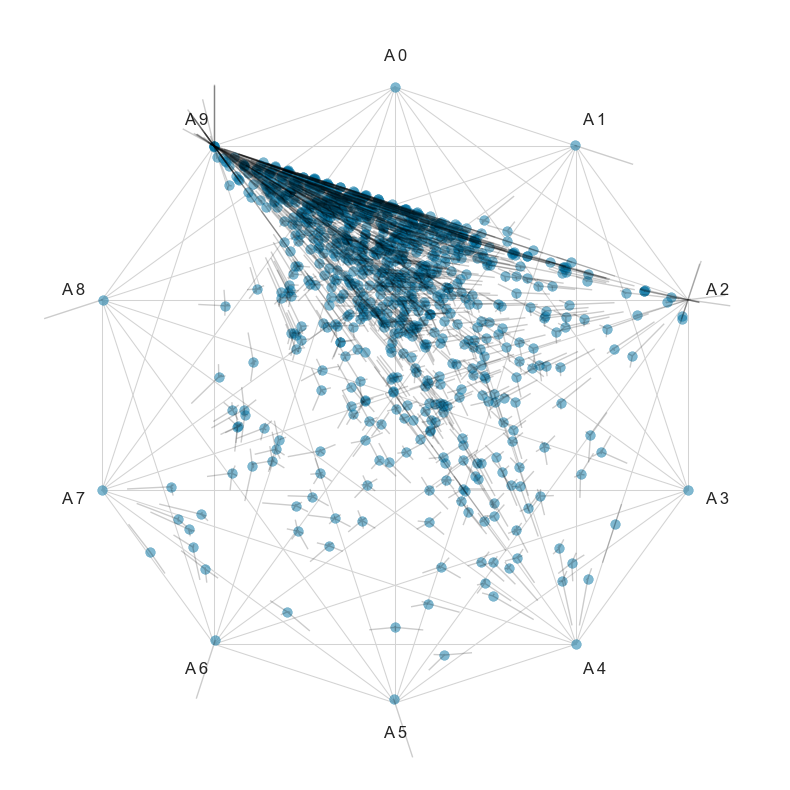

In [194]:
plt.figure(figsize=(10, 10))
arch.simplex(arch_model.alphas_, alpha=0.5, show_circle=False, show_direction=True)
plt.show()

This graph is pretty cool, but like others in this chapter, still reasonably hard to interpret at first. In reality, it is rather easy: The points on the perimeter, A0-A9 represent the archetypes. The closer a data point - represented by a circle - is to one of the archetype points, the more similar that data point is to the archetype.

Let's try K=6.

In [195]:
arch_model= arch.AA(n_archetypes=6, n_init=10, max_iter=30, random_state=2063).fit(dota_df2)
pd.DataFrame(arch_model.archetypes_, columns=list(dota_df2.columns))

,GamesPlayed,GamesWon,GamesLeft,Ditches,Points,Kills,KillsPerMin,Deaths,Assists,CreepsKilled,CreepsDenied,NeutralsKilled,TowersDestroyed,RaxsDestroyed,TotalTime
0,0.688673,0.826097,3.233586,1.668820,5.318099,0.896016,0.981001,0.431387,0.615715,0.731547,0.121679,0.775327,1.327131,1.185157,0.687100
1,-0.432092,-0.435234,-0.509481,-0.393625,-0.745611,-0.404742,-1.884113,-0.422612,-0.424139,-0.382188,-0.329295,-0.423926,-0.402725,-0.398570,-0.465625
2,14.911508,14.807315,11.845577,0.712608,3.301218,15.402842,3.012572,13.663189,14.997938,18.430041,21.311381,14.030718,14.395156,14.892650,8.564247
3,5.628757,4.902539,2.649080,9.249416,-0.459170,4.419389,0.052768,6.885750,4.434147,5.125861,2.421176,6.831985,5.319433,4.523304,6.362035
4,-0.442914,-0.426593,-0.403416,-0.393625,-0.384124,-0.398376,3.625638,-0.450997,-0.423443,-0.382765,-0.331506,-0.421807,-0.398017,-0.396262,-0.477328
5,6.223965,6.657263,-0.139874,1.262920,4.255685,7.264598,0.895414,5.463627,6.186671,6.850750,6.166256,3.957997,8.168642,8.505824,7.018898


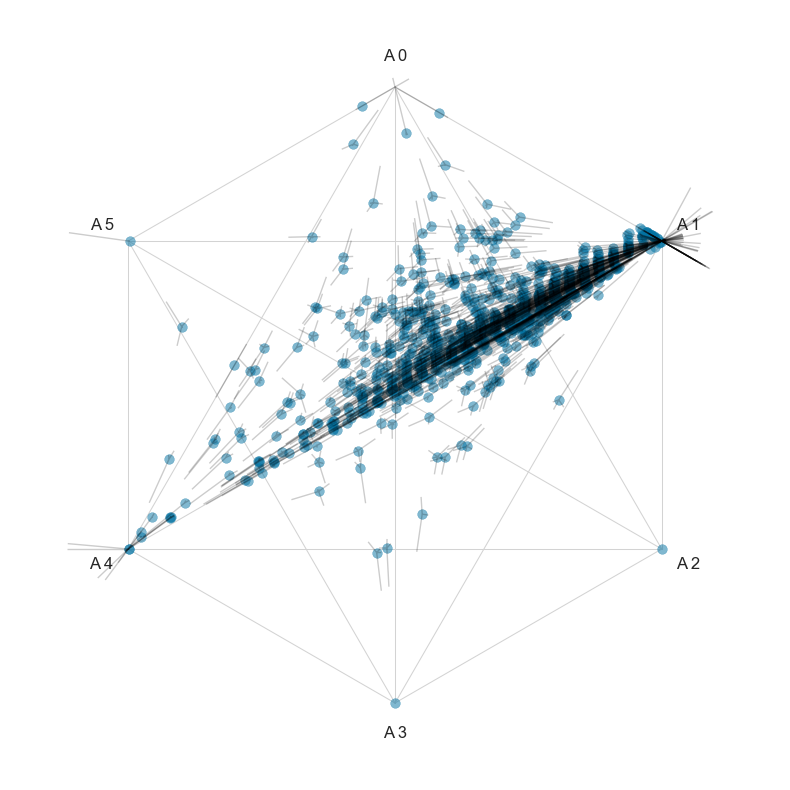

In [196]:
plt.figure(figsize=(10, 10))
arch.simplex(arch_model.alphas_, alpha=0.5, show_circle=False, show_direction=True)
plt.show()

Lastly, let's fall back to our familiar K=5 from previous labs.

In [197]:
arch_model= arch.AA(n_archetypes=5, n_init=10, max_iter=30, random_state=2063).fit(dota_df2)
pd.DataFrame(arch_model.archetypes_, columns=list(dota_df2.columns))

,GamesPlayed,GamesWon,GamesLeft,Ditches,Points,Kills,KillsPerMin,Deaths,Assists,CreepsKilled,CreepsDenied,NeutralsKilled,TowersDestroyed,RaxsDestroyed,TotalTime
0,14.911508,14.807315,11.845577,0.712608,3.301218,15.402842,3.012572,13.663189,14.997938,18.430041,21.311381,14.030718,14.395156,14.892650,8.564247
1,1.181063,1.413919,2.579029,1.265724,8.302895,1.905162,1.948600,0.907316,1.026783,1.481999,0.320601,1.203657,2.663809,2.603387,1.209312
2,5.676102,5.104392,2.918155,8.497670,-0.129010,4.519862,0.121985,6.618503,4.898199,4.888235,2.690889,6.548085,5.079888,4.481130,6.404150
3,-0.431292,-0.419489,-0.143972,-0.337094,-0.486930,-0.377750,3.693193,-0.441140,-0.413905,-0.371643,-0.319574,-0.417883,-0.386955,-0.385113,-0.467312
4,-0.433817,-0.435234,-0.509820,-0.393625,-0.685019,-0.404860,-1.911080,-0.427018,-0.424457,-0.382582,-0.330253,-0.423757,-0.402727,-0.398570,-0.467508


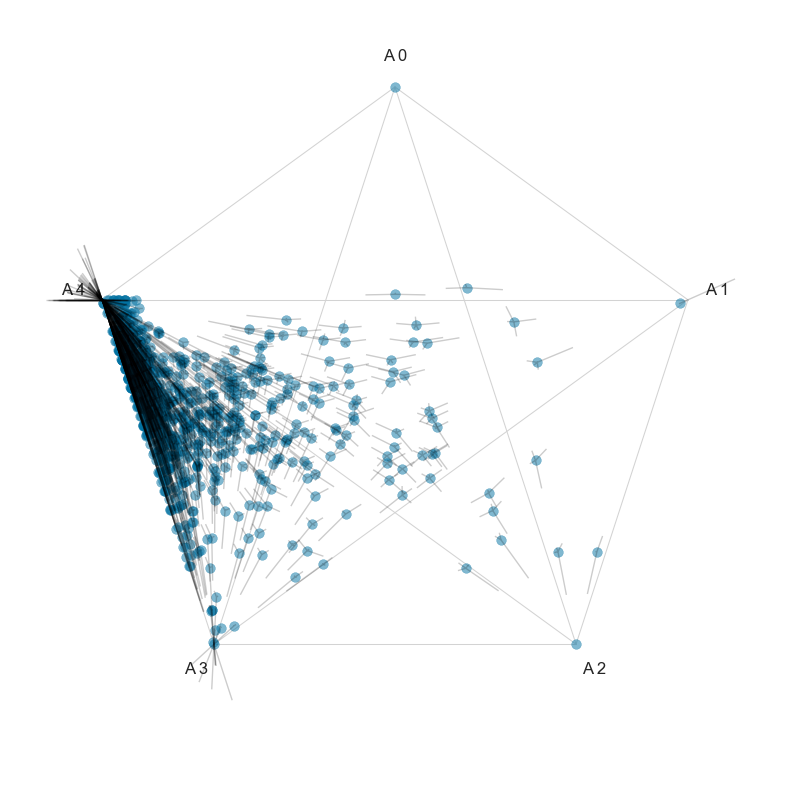

In [198]:
plt.figure(figsize=(10, 10))
arch.simplex(arch_model.alphas_, alpha=0.5, show_circle=False, show_direction=True)
plt.show()

## Conclusion

In this lab, we walked through an implementation of Archetypal Analysis in an attempt to create some useful archetypes from the data. This type of algorithm is different from other clustering algorithms - in fact it is much more like a PCA algorithm. It is still interesting to compare this with the other clustering methods we've explored. This is why we looked at K=5 when we visualized our outputs. You can see that all the points tend to cluster around archetypes 3 and 4. If you remember, in the other labs, the results kept tending strongly toward 2 clusters. This could support those results.